# 全美婴儿姓名分析

## 先加载一个数据文件随便看看

In [10]:
import pandas as pd
# 读取数据
names1880 = pd.read_csv('D:/python_project/names/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [11]:
# type(names1880)
names1880.describe()

,births
count,2000.000000
mean,100.743000
std,466.120297
min,5.000000
25%,7.000000
50%,13.000000
75%,41.250000
max,9655.000000


In [12]:
names1880[50:60]

,name,sex,births
50,Dora,F,524
51,Rosa,F,507
52,Katherine,F,502
53,Agnes,F,473
54,Marie,F,471
55,Nora,F,471
56,May,F,462
57,Mamie,F,436
58,Blanche,F,427
59,Stella,F,414


In [13]:
# names1880[50:60]
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [15]:
# names1880['births']

In [18]:
def get_half(b):
    if b >2000:
        return 'A'
    else:
        return 'B'
    
names1880['type'] = names1880.births.apply(get_half)

In [21]:
# names1880.head(10)
names1880[(names1880.type=='A') & (names1880.sex=='F')]

,name,sex,births,type
0,Mary,F,7065,A
1,Anna,F,2604,A
2,Emma,F,2003,A


In [5]:
names1880.describe()

,births
count,2000.000000
mean,100.743000
std,466.120297
min,5.000000
25%,7.000000
50%,13.000000
75%,41.250000
max,9655.000000


In [27]:
names1880[names1880.births>9000]

,name,sex,births,type
942,John,M,9655,A
943,William,M,9533,A


In [23]:
# names1880.births==9655

In [28]:
# 按性别分组小计
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## 加载数据，加载所有数据文件到一个DataFrame

In [30]:
import pandas as pd
# 将分布在多个文件中的数据合并到一个大的DataFrame中
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'D:/python_project/names/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    # 为DataFrame增加年份列
    frame['year'] = year
    pieces.append(frame)
    
# 将所有数据合并到单个DataFrame中
names = pd.concat(pieces, ignore_index=True)
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [31]:
names.shape

(1690784, 4)

## 按年份男女婴儿个数

In [32]:
# 以births作为目标，以year作为行index，以sex分组，进行sum
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


** 图形显示 **

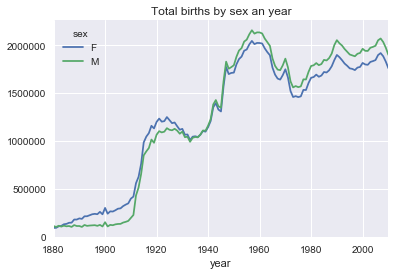

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 画图
total_births.plot(title='Total births by sex an year')

## 分析命名趋势

### 按名字占比分析

In [6]:
# prop列，用来存放指定名字的婴儿数相对于总出生数的比例
# 先使用year和sex对数据进行分组，然后计算每个名字在组内的占比
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [7]:
# names.prop.sum()

In [8]:
# 验证所有分组的prop的总和是否为1，因为小数位数的问题，可能不会精确相等，使用allclose()方法来看是否足够近似于1
# np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

### 按年按性别最流行的的1000个名字

In [9]:
# 取出每组数据的前1000名
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
# grouped.size()
top1000 = grouped.apply(get_top1000)
print('总记录数：%d' % len(top1000))
top1000.tail()

总记录数：261877


name sex  births  year      prop
year sex                                            
2010 M   1677639  Camilo   M     194  2010  0.000102
         1677640  Destin   M     194  2010  0.000102
         1677641  Jaquan   M     194  2010  0.000102
         1677642  Jaydan   M     194  2010  0.000102
         1677645  Maxton   M     193  2010  0.000102

** 看看2009年最流行的男孩名 **

In [42]:
top1000.ix[2009, 'M'][:10]

,name,sex,births,year,prop
1642467,Jacob,M,21036,2009,0.010660
1642468,Ethan,M,19783,2009,0.010025
1642469,Michael,M,18822,2009,0.009538
1642470,Alexander,M,18175,2009,0.009210
1642471,William,M,17852,2009,0.009047
1642472,Joshua,M,17549,2009,0.008893
1642473,Daniel,M,17456,2009,0.008846
1642474,Jayden,M,17193,2009,0.008713
1642475,Noah,M,17176,2009,0.008704
1642476,Christopher,M,16264,2009,0.008242


In [47]:
# 也可以换一种写法
top1000[(top1000.year==2009) & (top1000.sex=='M')][:10]

name sex  births  year      prop
year sex                                                 
2009 M   1642467        Jacob   M   21036  2009  0.010660
         1642468        Ethan   M   19783  2009  0.010025
         1642469      Michael   M   18822  2009  0.009538
         1642470    Alexander   M   18175  2009  0.009210
         1642471      William   M   17852  2009  0.009047
         1642472       Joshua   M   17549  2009  0.008893
         1642473       Daniel   M   17456  2009  0.008846
         1642474       Jayden   M   17193  2009  0.008713
         1642475         Noah   M   17176  2009  0.008704
         1642476  Christopher   M   16264  2009  0.008242

In [48]:
# # 查看下按年分性别的名字个数
# count_names = names.pivot_table('name', index='year', columns='sex', aggfunc='count')
# count_names.head()

In [49]:
# # 将前1000的名字分为，男女两个部分
# boys = top1000[top1000.sex == 'M']
# girls = top1000[top1000.sex == 'F']
# boys.tail()

In [11]:
# 生成按year和name统计的总出生数透视图
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births[:10]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [13]:
# total_births.T[:10]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001871DAD6438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001871DB635C0>], dtype=object)

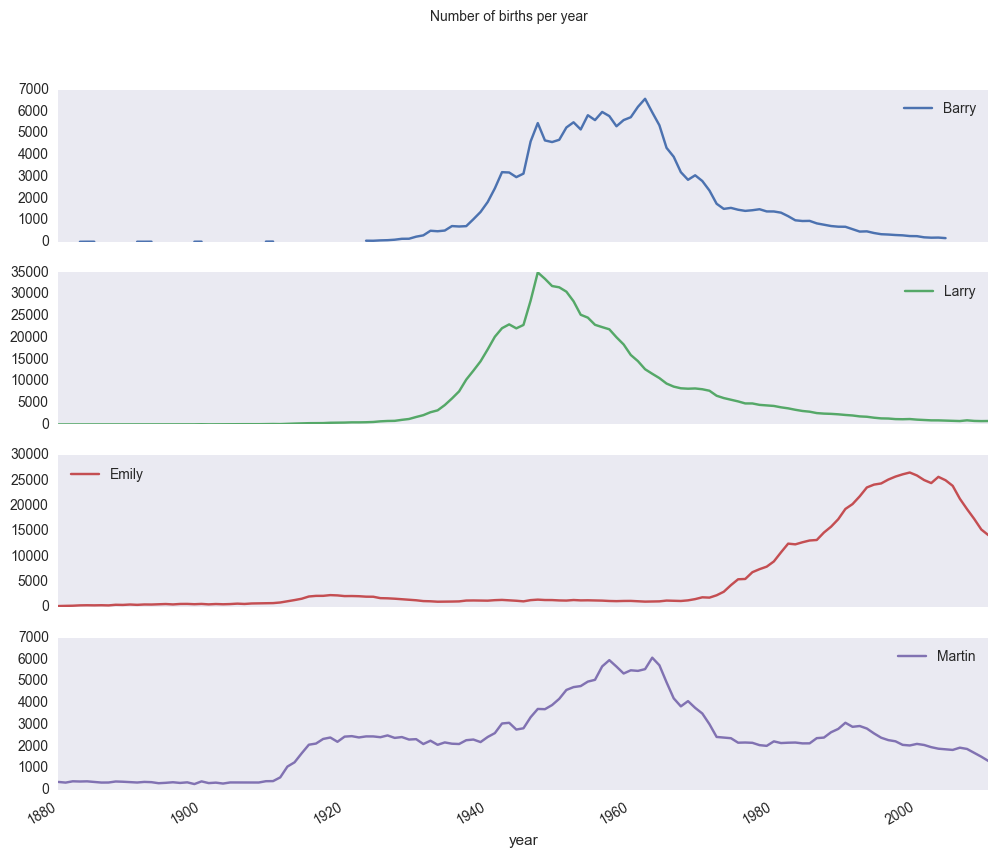

In [52]:
# 绘制几个名字的曲线图
subset = total_births[['Barry', 'Larry', 'Emily', 'Martin']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

### 看看命名的多样性变化

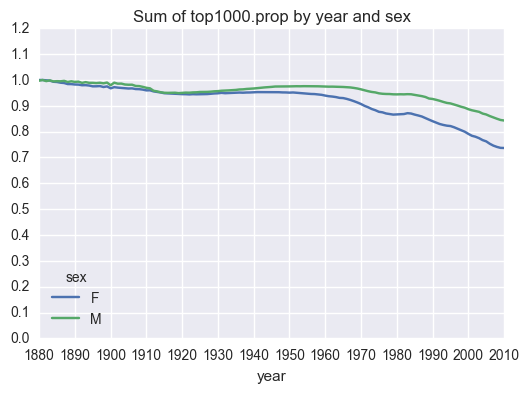

In [53]:
# 看看命名的多样性变化
# 计算最流行的1000个名字所占的比例
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of top1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

- 可以看出，命名最多的前1000个名字的总占比变小了，说明姓名的多样性得到了增长

In [54]:
# 前50%的出生人口，有多少名字
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    # 注意cumsum方法，searchsorted()查找应该插入的位置，通过寻找插入0.5的位置，来找出前50%的婴儿有多少名字
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity.head()

year  sex
1880  F      [38]
      M      [14]
1881  F      [38]
      M      [14]
1882  F      [38]
dtype: object

In [55]:
diversity = diversity.unstack('sex')
diversity.F = diversity.F.astype(float)
diversity.M = diversity.M.astype(float)
diversity.head()

sex,F,M
year,,
1880,38.0,14.0
1881,38.0,14.0
1882,38.0,15.0
1883,39.0,15.0
1884,39.0,16.0


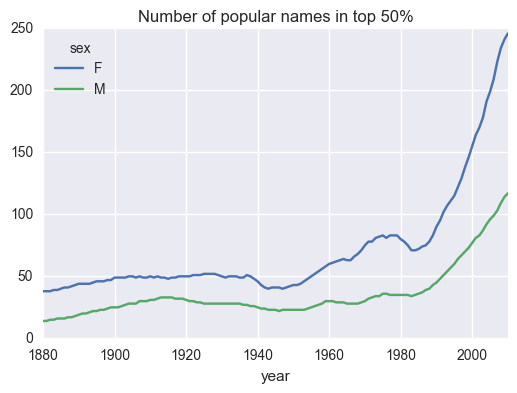

In [57]:
diversity.plot(title='Number of popular names in top 50%')

- 女孩姓名明显比男孩多样

## 分析名字最后一个字母的变化

In [59]:
# 分析名字的最后一个字母的变革
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [60]:
# 挑选典型的三个年份的数据，看看
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [62]:
# subtable.sum()

In [61]:
# 计算每个尾字母人数的占比
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

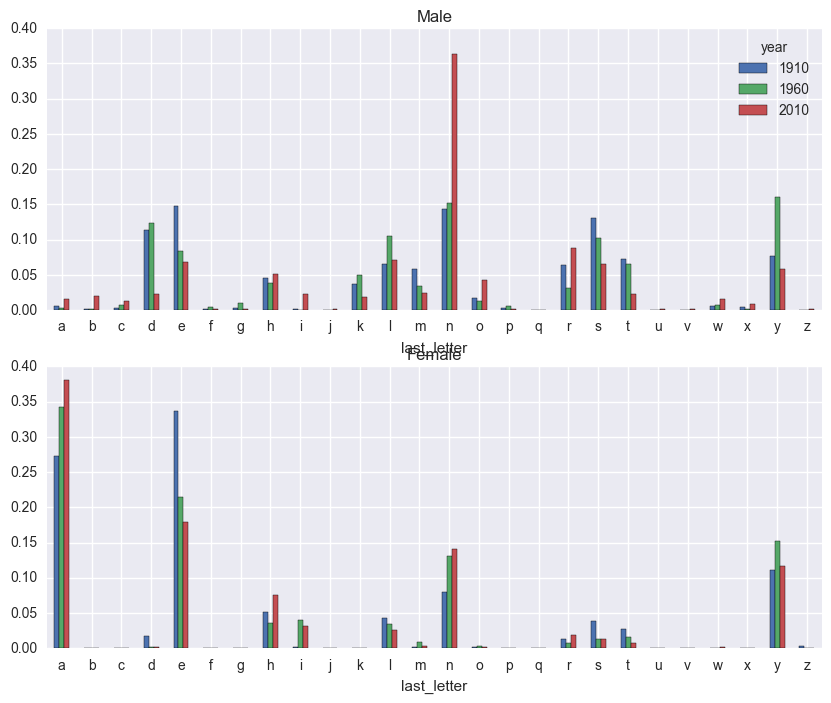

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [64]:
# 选取几个字母看下趋势
letter_prop = table / table.sum().astype(float)
# 下面这个“.T”？
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


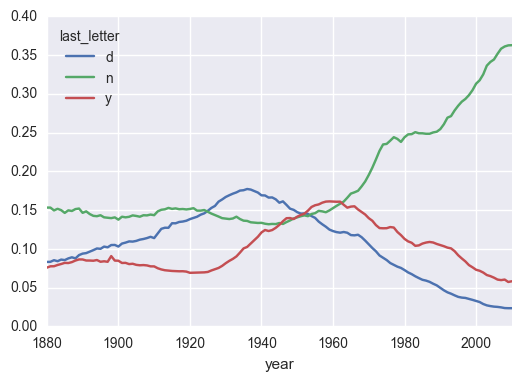

In [65]:
dny_ts.plot()

## 原先男孩常用，现在女孩常用的名字

In [66]:
# 找变成女孩名字的男孩名字(以lesl开头)
# 找出以lesl开头的名字
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [67]:
# 利用上步的结果过滤其他名字，并按名字分组计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()
# filtered

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [68]:
# 按性别和年度进行聚合，并按年度进行规范化处理
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
# table.sum(1)
# table.tail()
# 注意“table.sum(1)”，这个是指明了在那个层级上进行sum
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


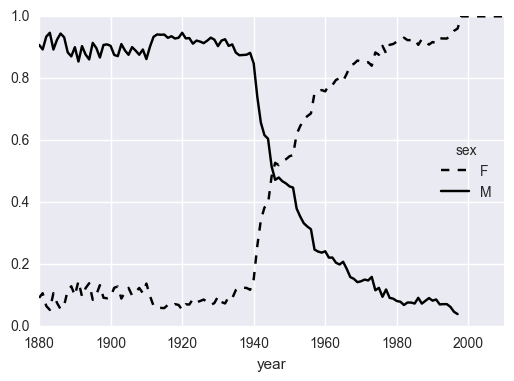

In [69]:
# 绘制年度曲线
table.plot(style={'M': 'k-', 'F': 'k--'})
# table.plot()

In [36]:
# 显示全部或部分输入历史
%hist